<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-joseovalle_A01150742/blob/main/TecMty_Regresion_lineal_polinomial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> # Alumno: José Ovalle Alvarado
> # Matrícula: A0150742
> # Materia: Ciencia y Analítica de Datos
> # Profesor: María de la Paz Rico Fernández
> # Fecha: 08/11/2022
> # Actividad Semanal 7: Regresiones

# Linear Models


- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [2]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_validate,  RepeatedKFold, GridSearchCV
from sklearn import metrics
from sklearn.metrics import r2_score
# to make this notebook's output stable across runs
np.random.seed(42)

In [3]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [4]:
np.random.rand(100, 1)

array([[0.37454012],
       [0.95071431],
       [0.73199394],
       [0.59865848],
       [0.15601864],
       [0.15599452],
       [0.05808361],
       [0.86617615],
       [0.60111501],
       [0.70807258],
       [0.02058449],
       [0.96990985],
       [0.83244264],
       [0.21233911],
       [0.18182497],
       [0.18340451],
       [0.30424224],
       [0.52475643],
       [0.43194502],
       [0.29122914],
       [0.61185289],
       [0.13949386],
       [0.29214465],
       [0.36636184],
       [0.45606998],
       [0.78517596],
       [0.19967378],
       [0.51423444],
       [0.59241457],
       [0.04645041],
       [0.60754485],
       [0.17052412],
       [0.06505159],
       [0.94888554],
       [0.96563203],
       [0.80839735],
       [0.30461377],
       [0.09767211],
       [0.68423303],
       [0.44015249],
       [0.12203823],
       [0.49517691],
       [0.03438852],
       [0.9093204 ],
       [0.25877998],
       [0.66252228],
       [0.31171108],
       [0.520

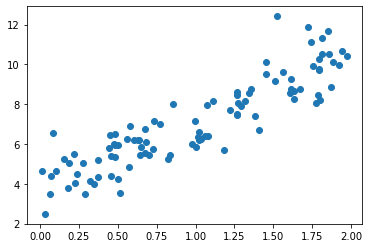

In [5]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [6]:
import pandas as pd
pd.DataFrame(y)

,0
0,3.508550
1,8.050716
2,6.179208
3,6.337073
4,11.311173
...,...
95,5.441928
96,10.121188
97,9.787643
98,8.061635


In [7]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [8]:
#X_fit[]

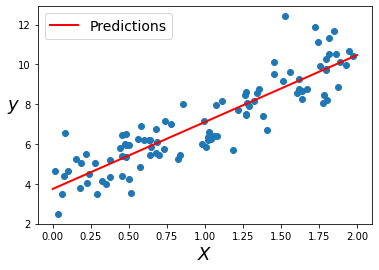

In [9]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [10]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [11]:
X_new.shape

(2, 1)

In [12]:
y_new = linear_reg.predict(X_new)
y_new

array([[ 3.74406122],
       [10.47517611]])

In [13]:
 linear_reg.coef_, linear_reg.intercept_

(array([[3.36555744]]), array([3.74406122]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [14]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model to fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [15]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

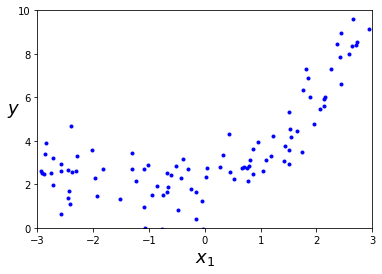

In [16]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [17]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.529240
1,3.768929
2,3.354423
3,2.747935
4,0.808458
...,...
95,5.346771
96,6.338229
97,3.488785
98,1.372002


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [19]:
X_poly

array([[ 2.72919168e+00,  7.44848725e+00],
       [ 1.42738150e+00,  2.03741795e+00],
       [ 3.26124315e-01,  1.06357069e-01],
       [ 6.70324477e-01,  4.49334905e-01],
       [-4.82399625e-01,  2.32709399e-01],
       [-1.51361406e+00,  2.29102753e+00],
       [-8.64163928e-01,  7.46779295e-01],
       [ 1.54707666e+00,  2.39344620e+00],
       [-2.91363907e+00,  8.48929262e+00],
       [-2.30356416e+00,  5.30640783e+00],
       [-2.72398415e+00,  7.42008964e+00],
       [-2.75562719e+00,  7.59348119e+00],
       [ 2.13276350e+00,  4.54868016e+00],
       [ 1.22194716e+00,  1.49315485e+00],
       [-1.54957025e-01,  2.40116797e-02],
       [-2.41299504e+00,  5.82254504e+00],
       [-5.03047493e-02,  2.53056780e-03],
       [-1.59169375e-01,  2.53348900e-02],
       [-1.96078878e+00,  3.84469264e+00],
       [-3.96890105e-01,  1.57521755e-01],
       [-6.08971594e-01,  3.70846402e-01],
       [ 6.95100588e-01,  4.83164828e-01],
       [ 8.10561905e-01,  6.57010602e-01],
       [-2.

`X_poly` now contains the original feature of X plus the square of the feature:

In [20]:
print(X[0])
print(X[0]*X[0])


[2.72919168]
[7.44848725]


In [21]:
X_poly[0]

array([2.72919168, 7.44848725])

Fit the model to this extended training data:

In [22]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[1.04271531, 0.50866711]]), array([2.01873554]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

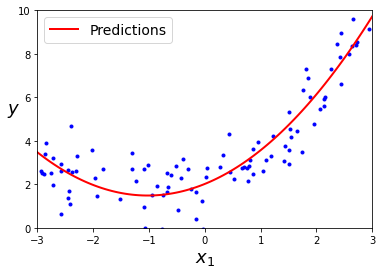

In [23]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [24]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
968,7.065653,27.804027
212,3.372115,41.127212
416,4.194513,43.832711
677,5.068888,41.225741
550,4.604122,37.569764
764,5.389522,31.191501
386,4.104190,42.988730
339,3.942214,46.291435
82,2.665856,48.578425
487,4.399514,37.567914


In [25]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [26]:
len(X)

1000

In [27]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

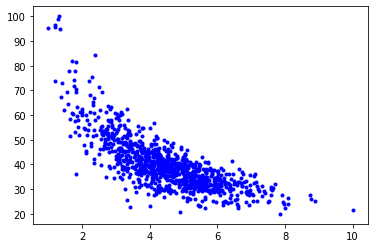

In [28]:
plt.plot(X,y,'b.')

**Divide los datos del costo de manufactura. Utiliza la función train_test_split (viene el ejemplo al final del notebook).**

In [29]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = .20, random_state = 0)

In [30]:
#lineal
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(x_train, y_train)
lin_reg.coef_, lin_reg.intercept_

(array([-6.12396253]), 67.51699929483895)

**Esta es la visualización correspondiente de la regresíón lineal simple**

In [31]:
# PLOTTING THE DATA 
# construct best fit line
X_train_fit = np.linspace(1, 10, 100)
y_train_fit = lin_reg.coef_[0] * X_fit +  lin_reg.intercept_

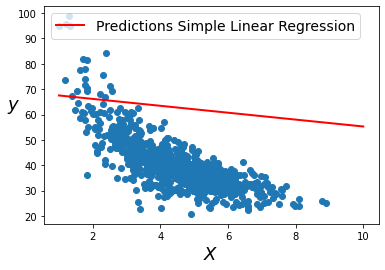

In [32]:
plt.scatter(x_train, y_train)
plt.plot(X_train_fit, y_train_fit, "r-", linewidth=2, label="Predictions Simple Linear Regression")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [33]:
y_pred = lin_reg.predict(x_train)

**La ecuación de la recta está dada por $Y= -6.12396253X + 67.51699929483895$**

In [34]:
# Errores en entrenamiento para regresión lineal.

In [35]:
mae_simple = metrics.mean_absolute_error(y_train, y_pred)
r2_simple = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.945478137356366
r2_score 0.5836439303438314


**Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.**

**Regresión Polinomial:**

In [36]:
n_degree = 4
poly_features = PolynomialFeatures(degree = n_degree , include_bias=False)
X_poly = poly_features.fit_transform(x_train)

In [37]:
X_poly

array([[  5.10000757,  26.01007719, 132.65159053, 676.52411562],
       [  4.43739951,  19.69051438,  87.37467876, 387.71635639],
       [  3.92588875,  15.41260245,  60.50816254, 237.5483144 ],
       ...,
       [  4.93885188,  24.39225786, 120.46974853, 594.98224365],
       [  4.62435992,  21.38470463,  98.89057092, 457.30559223],
       [  5.09134852,  25.9218298 , 131.97706993, 671.94126034]])

In [38]:
lin_reg_mult = LinearRegression(fit_intercept=True)
lin_reg_mult.fit(X_poly, y_train)
lin_reg_mult.coef_, lin_reg_mult.intercept_

(array([-54.79268482,  12.76214504,  -1.42275359,   0.05994369]),
 131.2386382504135)

In [39]:
np.shape(x_train)
len(x_train)

800

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


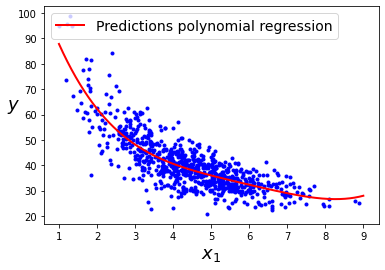

In [40]:
X_new=np.linspace(1, 9,len(x_train)).reshape(len(x_train), 1)
X_new_poly = poly_features.transform(X_new)
X_new_poly
y_new = lin_reg_mult.predict(X_new_poly)
y_new = np.ravel(y_new)
y_new
plt.plot(x_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions polynomial regression")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

**La ecuación de la curva generada por regresión lineal múltiple está dada por $Y= 0.05994369X^4-1.42275359X^3+12.76214504X^2-54.79268482X +131.23863825040115$**

In [41]:
y_pred = lin_reg_mult.predict(X_poly) #transformación de x_train
mae_poly = metrics.mean_absolute_error(y_train, y_pred)
r2_poly = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.489009440750899
r2_score 0.6857421718444109


**Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.**

**Lasso:**

In [42]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline

model_lasso = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = n_degree , include_bias=False)),
                        # ("scaler",StandardScaler()),
                        ("lasso", Lasso( alpha = .1, random_state = 0 ))   
                       ])

model_lasso.fit(x_train,y_train)
y_pred = model_lasso.predict(x_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.269e+04, tolerance: 8.976e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [43]:
x_new=np.linspace(1, 9,len(x_train)).reshape(len(x_train), 1)
y_new = model_lasso.predict(x_new)
y_new = np.ravel(y_new)
# y_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


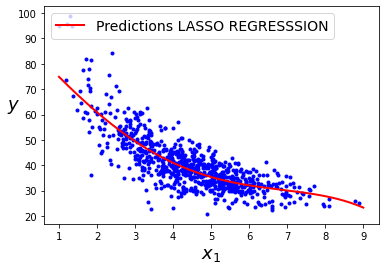

In [44]:
plt.plot(x_train, y_train, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions LASSO REGRESSSION")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [45]:
# errores lasso
mae_lasso = metrics.mean_absolute_error(y_train, y_pred)
r2_lasso = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.500418535710009
r2_score 0.6723610330969251


In [46]:
print("Coeff\n:", model_lasso["lasso"].coef_)
print("\n")
print("Intercept \n:",model_lasso["lasso"].intercept_)

Coeff
: [-16.05531921   0.15756559   0.26982743  -0.02015672]


Intercept 
: 90.53896286555887


**La ecuación de la curva generada por LASSO está dada por $Y=-0.02015672X^4+0.26982743X^3+ 0.15756559X^2-16.05531921X +90.53896286555887$**

**Ridge**

In [47]:
from sklearn.linear_model import Ridge

model_ridge = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = n_degree , include_bias=False)),
                        #("scaler",StandardScaler()),
                        ("ridge", Ridge( alpha = .001, random_state = 0 ))   
                       ])

model_ridge.fit(x_train,y_train)
y_pred = model_ridge.predict(x_train)

In [48]:
x_new=np.linspace(1, 9,len(x_train)).reshape(len(x_train), 1)
y_new = model_ridge.predict(x_new)
y_new = np.ravel(y_new)
# y_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


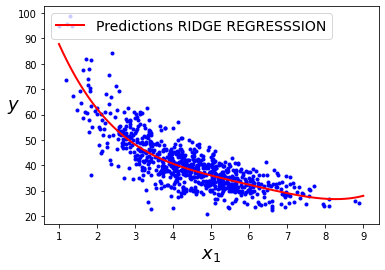

In [49]:
plt.plot(x_train, y_train, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions RIDGE REGRESSSION")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [50]:
# errores ridge
mae_ridge = metrics.mean_absolute_error(y_train, y_pred)
r2_ridge = r2_score(y_train, y_pred)
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 4.488932947381665
r2_score 0.6857421131040113


In [51]:
# ceoficientes ridge
print("Coeff\n:", model_lasso["lasso"].coef_)
print("\n")
print("Intercept \n:",model_lasso["lasso"].intercept_)

Coeff
: [-16.05531921   0.15756559   0.26982743  -0.02015672]


Intercept 
: 90.53896286555887


**La ecuación de la curva generada por RIDGE está dada por $Y=-0.02015672X^4+0.26982743X^3+ 0.15756559X^2-16.05531921X +90.53896286555887$**

**Grafica :
MAE (de los cuatro métodos)
R2 (de los cuatro métodos)**

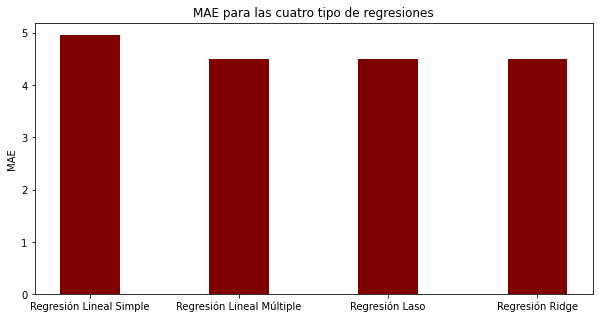

In [52]:
data = {'Regresión Lineal Simple':mae_simple, 'Regresión Lineal Múltiple':mae_poly, 'Regresión Laso':mae_lasso,'Regresión Ridge':mae_ridge}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 

plt.ylabel("MAE")
plt.title("MAE para las cuatro tipo de regresiones")
plt.show()

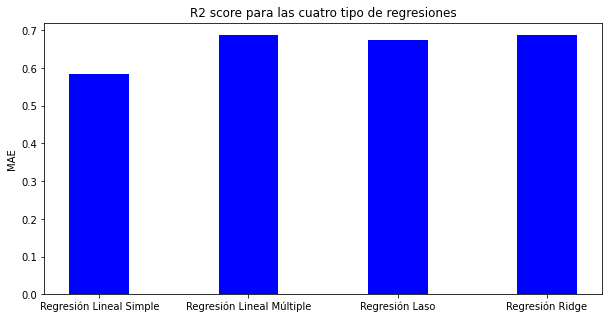

In [53]:
data = {'Regresión Lineal Simple':r2_simple, 'Regresión Lineal Múltiple':r2_poly, 'Regresión Laso':r2_lasso,'Regresión Ridge':r2_ridge}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 

plt.ylabel("MAE")
plt.title("R2 score para las cuatro tipo de regresiones")
plt.show()

Explica tus resultados, que método conviene más a la empresa, ¿por que?, ¿que porcentajes de entrenamiento y evaluación usaste?, ¿que error tienes?, ¿es bueno?, ¿cómo lo sabes?

**Los métodos que presentan el menore error son Regresión Lineal Múltiple, y Regresión Ridge, así mismo los métodos que presentan mejor R2 score son estos dos métodos. Analizando los resultados el método de regresión Ridge parece una buena opción ya que a pesar de que es una ecuación de orden 4 la que se está considerando, sólo los términos de grado 4, 2 y el coficiente son neceesarios para obtener un desmpeño similar que la ecuación polinómica. El porcentaje de entrenamiento y evaluación utilizado será 80% entrenamiento y 20% validación.**


In [54]:
model_ridge = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = n_degree , include_bias=False)),
                        ("scaler",StandardScaler()),
                        ("ridge", Ridge( alpha = .001, random_state = 0 ))   
                       ])

model_ridge.fit(x_test,y_test)
y_pred = model_ridge.predict(x_test)

In [55]:
x_new=np.linspace(1, 9,len(x_test)).reshape(len(x_test), 1)
y_new = model_ridge.predict(x_new)
y_new = np.ravel(y_new)
# y_new

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


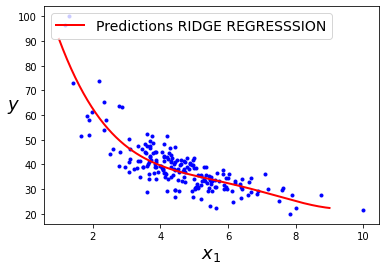

In [56]:
plt.plot(x_test, y_test, "b.")
plt.plot(x_new, y_new, "r-", linewidth=2, label="Predictions RIDGE REGRESSSION")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)

In [57]:
# errores ridge
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('r2_score',r2_score(y_test, y_pred))

Error medio Absoluto (MAE): 4.222163949022255
r2_score 0.7249522310237082


 **Los resultados finales muestran un error MAE de 4.22 ligeramente mejor que el de entrenamiento y el r2 aumentó a .72, siendo este un buen fit de para la data**

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [58]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5954,7852020250,20140602T000000,725995.0,4,2.50,3190,7869,2.0,0,2,...,9,3190,0,2001,0,98065,47.5317,-121.866,2630,6739
8610,6392002020,20150324T000000,559000.0,3,1.75,1700,6500,1.0,0,0,...,8,1700,0,1967,0,98115,47.6837,-122.284,1880,6000
7650,626049058,20150504T000000,275000.0,5,2.50,2570,17234,1.0,0,0,...,7,1300,1270,1959,0,98133,47.7753,-122.355,1760,7969
5683,2202500255,20150305T000000,335000.0,3,2.00,1210,9926,1.0,0,0,...,7,1210,0,1954,2015,98006,47.5731,-122.135,1690,9737
20772,1972200428,20140625T000000,563500.0,3,2.50,1400,1312,3.5,0,0,...,8,1400,0,2007,0,98103,47.6534,-122.355,1350,1312
6959,723000114,20140505T000000,1395000.0,5,3.50,4010,8510,2.0,0,1,...,9,2850,1160,1971,0,98105,47.6578,-122.286,2610,6128
10784,4104900340,20150204T000000,710000.0,4,2.50,3220,18618,2.0,0,1,...,10,3220,0,1991,0,98056,47.5326,-122.181,2650,11896
21528,3416600750,20150217T000000,585000.0,3,2.50,1750,1381,3.0,0,0,...,8,1750,0,2008,0,98122,47.6021,-122.294,1940,4800
12319,2386000070,20141029T000000,795127.0,4,3.25,4360,91158,1.0,0,0,...,10,3360,1000,1993,0,98053,47.6398,-121.985,3540,90940
19947,1776460110,20141223T000000,395000.0,4,2.75,2280,5013,2.0,0,0,...,8,2280,0,2009,0,98019,47.7333,-121.976,2130,5121


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [60]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [61]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


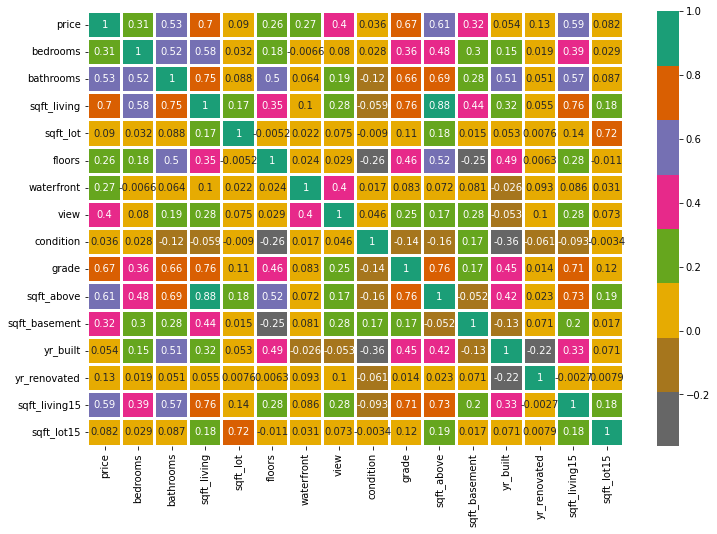

In [62]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [63]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


Regresión Múltiple Lineal

In [65]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
7712,5,2.75,3750,12077,2.0,0,4,3,10,3750,0,2005,0,3120,7255
7545,4,4.50,5250,48352,2.0,0,0,3,10,5250,0,1998,0,2500,48352
4158,3,2.50,2880,10126,2.0,0,0,4,10,2880,0,1985,0,2960,10514
17476,5,1.75,3250,13702,1.0,0,2,3,8,1650,1600,1965,0,2620,11328
20791,4,2.75,3090,5859,2.0,0,0,3,9,3090,0,2010,0,2960,5250


In [66]:
model_linear = Pipeline([
                        ("scaler",MinMaxScaler()),
                        ("MLR", LinearRegression())   
                       ])

model_linear.fit(X_train,y_train)
y_pred = model_linear.predict(X_train)

In [67]:
# errores multiple linear regression
mae_mlr = metrics.mean_absolute_error(y_train, y_pred)
r2_mlr = r2_score(y_train, y_pred)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 139269.32939116764
r2_score 0.6529196653133834


In [68]:
model_linear["MLR"].coef_, model_linear["MLR"].intercept_

(array([[-1260626.55952267,   331729.10422852,   792445.80131859,
            28288.28137618,    79229.22828389,   552691.02331827,
           164997.29100813,    84888.57702443,  1433918.59024389,
           875158.67274477,   522502.02739398,  -408353.74809103,
            26719.3463191 ,   168553.44986043,  -477176.28921869]]),
 array([-366549.73585391]))

$Y = -1260626.55952267X1 + 331729.10422852X2 + 792445.80131859X3 +28288.28137618X4 + 79229.22828389X5 + 552691.02331827X6 + 164997.29100813X7 + 84888.57702443X8,  1433918.59024389X9 +875158.67274477X10 +522502.02739398X11 -408353.74809103X12 +26719.3463191X13 +168553.44986043X14 -477176.28921869X15$

Regresión Múltiple Polinomial

> Realiza la regresión polinomial completa, tu modelo generado (ecuación), sus errores y r cuadrada.

In [69]:
n_degree = 2

In [70]:
model_poly = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = n_degree , include_bias=False)),
                        ("scaler",MinMaxScaler()),
                        ("MLR", LinearRegression())     
                       ])

model_poly.fit(X_train,y_train)
y_pred = model_poly.predict(X_train)

In [71]:
# errores regresión múltiple polinomial
mae_poly = metrics.mean_absolute_error(y_train, y_pred)
r2_poly = r2_score(y_train, y_pred)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 123190.26592388019
r2_score 0.7469519415608243


In [72]:
model_poly["MLR"].coef_, model_poly["MLR"].intercept_

(array([[ 3.08177388e+07, -8.74237780e+06, -8.15334327e+14,
         -4.59983643e+07, -5.18584149e+06, -9.29673286e+12,
         -1.15448119e+06,  2.23439141e+06,  1.31833295e+07,
          5.61196149e+14,  2.96597087e+14, -9.88637159e+06,
         -5.95154365e+06,  2.32420715e+07, -2.96074472e+07,
          1.04264093e+06,  5.06200785e+05,  4.64602213e+14,
         -1.23066936e+05,  2.83059464e+05, -6.89438403e+04,
         -8.61037915e+03, -8.65529750e+05, -1.23983826e+06,
         -3.22888245e+14, -1.41713970e+14, -3.00101849e+07,
         -2.00788138e+05,  7.58302375e+05,  7.51812728e+05,
         -6.16411608e+05, -2.67899135e+14, -6.49661444e+05,
         -6.21751027e+05,  2.92744042e+05,  1.22555961e+05,
         -3.45478750e+04,  2.31888557e+06,  1.86183965e+14,
          8.17151723e+13,  8.04622106e+06, -2.71578875e+05,
         -6.70744398e+05, -2.64246508e+05, -1.08229988e+15,
         -3.46676901e+13,  1.12430344e+13,  1.70049465e+12,
         -1.83176028e+13, -7.64542368e+1

La ecuación múltiple polinomial se construye con los términos descritos arriba

*Ridge Regression*

In [73]:
model_ridge = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = n_degree , include_bias=False)),    
                        ("scaler",StandardScaler()),
                        ("ridge", Ridge( alpha = .001, random_state = 0))   
                       ])

model_ridge.fit(X_train,y_train)
y_pred = model_ridge.predict(X_train)

In [74]:
# errores ridge
mae_ridge = metrics.mean_absolute_error(y_train, y_pred)
r2_ridge = r2_score(y_train, y_pred)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 123188.68043864102
r2_score 0.746951884589927


In [75]:
model_ridge["ridge"].coef_, model_ridge["ridge"].intercept_

(array([[ 8.70363255e+05, -8.40986339e+05, -3.31209001e+05,
         -1.15132041e+06, -1.11348198e+06, -3.45740968e+05,
         -2.20197326e+05,  3.65648356e+05,  1.28873386e+06,
         -2.55725886e+05, -2.08495528e+05, -2.51060888e+06,
         -1.18715002e+06,  2.73446976e+06, -9.29535947e+05,
          9.82913285e+03,  3.16911264e+04, -3.96913823e+04,
         -2.75285074e+03,  2.12821032e+04, -3.45529466e+03,
         -8.89440759e+02, -2.10741263e+04, -5.04773427e+04,
         -2.91463859e+04, -3.85528024e+04, -8.63011036e+05,
         -1.33381348e+04,  6.30046791e+04,  2.06485907e+04,
         -3.55112485e+04,  5.20695694e+04, -1.52567084e+04,
         -5.37632269e+04,  1.06708127e+04,  8.26353956e+03,
         -2.98744671e+03,  1.82639371e+05,  5.89526066e+04,
          5.13364735e+03,  7.78819777e+05, -1.70902771e+04,
         -5.09785920e+04, -4.41654687e+03,  9.82865494e+03,
         -4.15233111e+04,  3.13617764e+03,  3.96044567e+04,
         -2.62277370e+04,  2.74926584e+0

LASSO Regreession

In [76]:
model_lasso = Pipeline([
                        ("poly_features", PolynomialFeatures(degree = n_degree , include_bias=False)),      
                        ("scaler",StandardScaler()),
                        ("lasso", Lasso( alpha = .001, random_state = 0))   
                       ])

model_lasso.fit(X_train,y_train)
y_pred = model_lasso.predict(X_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.355e+14, tolerance: 2.572e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [77]:
# errores lasso
mae_lasso = metrics.mean_absolute_error(y_train, y_pred)
r2_lasso = r2_score(y_train, y_pred)

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, y_pred))
print('r2_score',r2_score(y_train, y_pred))

Error medio Absoluto (MAE): 124944.9097760939
r2_score 0.7390904957796176


In [78]:
model_lasso["lasso"].coef_, model_lasso["lasso"].intercept_

(array([ 1.17357342e+05,  1.18672618e+05,  7.26068530e+04, -1.25442428e+05,
        -2.53576384e+04,  3.10392606e+04,  5.62676179e+04,  8.83711475e+04,
         2.12355769e+05, -1.51493147e+05, -2.71921670e+04, -1.11968597e+05,
        -1.00176995e+05,  9.22972116e+04, -4.19526357e+04,  1.10357281e+04,
        -1.31441918e+04, -1.01230909e+05, -2.61593148e+04,  2.01739360e+04,
        -6.74505525e+03, -2.37981975e+02, -6.93097589e+03, -3.63138181e+04,
         3.16113277e+04,  5.70685743e+02, -1.15654528e+05,  5.66817762e+01,
         6.88613022e+04,  2.55043308e+04,  4.30892859e+03,  1.84846176e+05,
        -2.58419691e+03, -5.59254735e+04,  1.34110387e+04,  1.29778949e+04,
        -5.53754349e+04,  1.48108709e+05, -4.61458223e+04, -4.98502497e+04,
        -1.06038096e+05, -2.72811456e+04, -9.97259536e+04,  1.08151808e+04,
         1.05878958e+05, -2.31208608e+04,  9.72877315e+03, -3.07296102e+04,
         8.31162076e+04, -4.13037389e+04,  2.29252967e+05, -2.39981266e+05,
         4.4

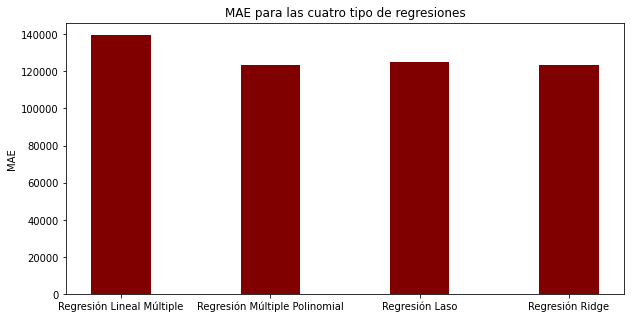

In [79]:
data = {'Regresión Lineal Múltiple':mae_mlr, 'Regresión Múltiple Polinomial':mae_poly, 'Regresión Laso':mae_lasso,'Regresión Ridge':mae_ridge}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon',
        width = 0.4)
 

plt.ylabel("MAE")
plt.title("MAE para las cuatro tipo de regresiones")
plt.show()

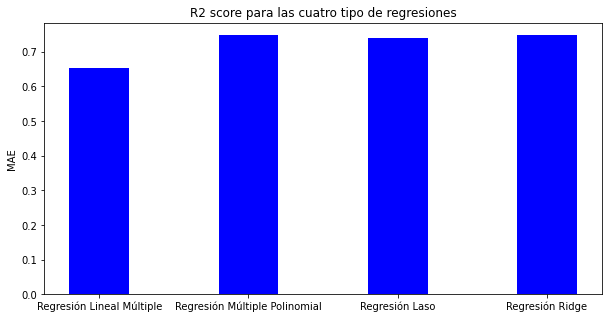

In [80]:
data = {'Regresión Lineal Múltiple':r2_mlr, 'Regresión Múltiple Polinomial':r2_poly, 'Regresión Laso':r2_lasso,'Regresión Ridge':r2_ridge}
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='blue',
        width = 0.4)
 

plt.ylabel("MAE")
plt.title("R2 score para las cuatro tipo de regresiones")
plt.show()

**Explica tus resultados, que método se aproxima mejor, ¿por qué?, ¿qué porcentajes de entrenamiento y evaluación usaste? ¿Que error tienes?, ¿es bueno?, ¿Cómo lo sabes?**



> **De forma similar al ejercicio previo, los métodos que presentan el menore error son Regresión Lineal Múltiple, y Regresión Ridge, así mismo los métodos que presentan mejor R2 score son estos dos métodos.**

> **Los porcentajes de entrentamiento y evaluación empleados fueron 90% entrenamiento y 10% validación.** 

> **Aunque el R2 score es elevado y el modelo justifica un 70% de la variación, el error es elevado para realizar proyecciones por lo cual es necesario realizar análisis de hiperparámetros para encontrar un buen accuracy o algun feature engineering generando nuevas métrica.** 



**Conclusiones**

Dentro de esta actividad se realizaron diferente tipos de regresiones. Los resultados de estos análisis muestran como al utilizar polinomios se obtienen un buen ajuste del modelo pero se pueden generar variables adicionales que generan sobreajuste al modelo, y esta corrección se logra utilizando los métodos LASSO y RIDGE generando así variables de mayor importancia y que aportan suficiente información al modelo.